In [80]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

## Dot product

In [5]:
nv1 = np.array([1, 2, 3, 4])
nv2 = np.array([0, 1, 0, -1])

print(np.dot(nv1, nv2))

print(np.sum(nv1 * nv2))

-2
-2


In [7]:
tv1 = torch.tensor([1, 2, 3, 4])
tv2 = torch.tensor([0, 1, 0, -1])

print(torch.dot(tv1, tv2))
print(torch.sum(tv1 * tv2))

tensor(-2)
tensor(-2)


## Entropy

$$
H(p) = -\sum_xp(x)\log{p(x)}
$$

In [13]:
x = [0.25, 0.75]

H = 0

for p in x:
    H -= p * np.log(p)

print(H)

0.5623351446188083


In [33]:
p = [1.0, 0.0]
q = [0.25, 0.75]

H = 0
for i in range(len(p)):
    H -= p[i] * np.log(q[i])

print(H)

1.3862943611198906


In [35]:
import torch.nn.functional as F

q_tensor = torch.tensor(q)
p_tensor = torch.tensor(p)

F.binary_cross_entropy(p_tensor, q_tensor)

tensor(75.)

## Softmax

In [38]:
z = [1, 2, 3]

num = np.exp(z)
den = np.sum(num)
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-5 11  8  9  2  7  0  3  6 11  4  2  1 -4 13  9  7  1 -1  6 -5  1 13 -3
  5]


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mbouhsen\AppData\Local\Temp\ipykernel_22456\2106769564.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Softmax $\sigma$')
C:\Users\mbouhsen\AppData\Local\Temp\ipykernel_22456\2106769564.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$\sum\sigma=1$')


Text(0.5, 1.0, '$\\sum\\sigma=1$')

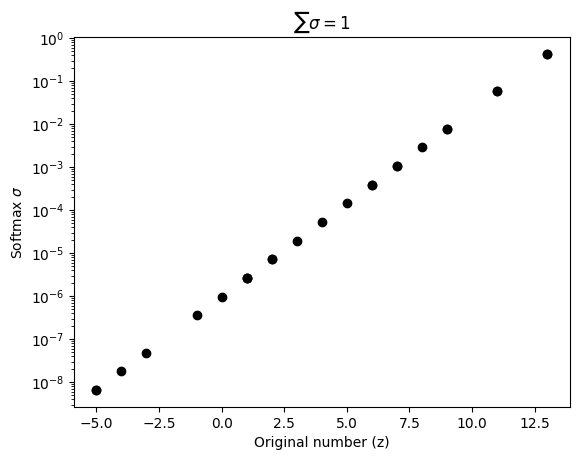

In [54]:
z = np.random.randint(-5, high = 15, size = 25)
print(z)

num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den


plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma=1$')

In [60]:
softfun = nn.Softmax(dim=0)

sigmaT = softfun(torch.Tensor(z))

print(sigmaT)

tensor([6.5607e-09, 5.8299e-02, 2.9026e-03, 7.8900e-03, 7.1947e-06, 1.0678e-03,
        9.7370e-07, 1.9557e-05, 3.9282e-04, 5.8299e-02, 5.3162e-05, 7.1947e-06,
        2.6468e-06, 1.7834e-08, 4.3078e-01, 7.8900e-03, 1.0678e-03, 2.6468e-06,
        3.5820e-07, 3.9282e-04, 6.5607e-09, 2.6468e-06, 4.3078e-01, 4.8478e-08,
        1.4451e-04])


Text(0.5, 1.0, 'The two methode correlate at r=1.0')

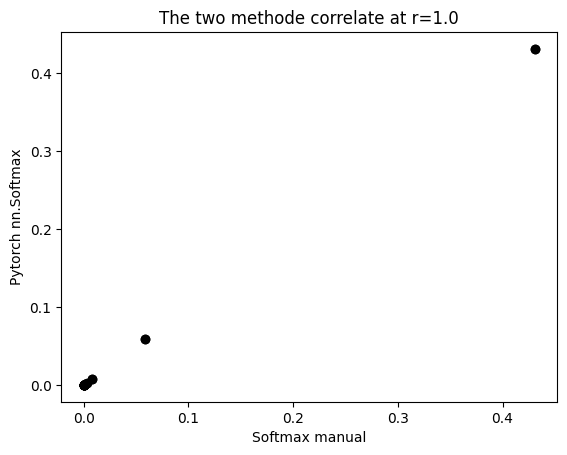

In [61]:
plt.plot(sigma, sigmaT, 'ko')
plt.xlabel('Softmax manual')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methode correlate at r={np.corrcoef(sigma, sigmaT)[0, 1]}')

## t-test